In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn import ensemble
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:/Users/91849/Desktop/MAJOR PROJECT/latest.csv")

In [4]:
data

,Year,Month,Day,Hour,Tamb,AirTemp,Azimuth,Cloudopacity,Dhi,Dni,Ghi,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
0,2007,1,2,0,17.7,18.3,-127,0.0,17,0,17,17,17,15.7,71.9,960.3,153,1.9,88,0.18
1,2007,1,2,1,17.4,19.4,-108,0.0,112,124,152,173,226,15.6,66.7,961.0,148,1.8,75,0.18
2,2007,1,2,2,17.2,21.0,-106,0.0,209,339,364,425,531,15.7,59.2,961.5,133,1.6,63,0.18
3,2007,1,2,3,17.1,23.2,-106,0.0,280,431,540,623,652,16.0,50.3,961.6,108,1.6,53,0.18
4,2007,1,2,4,17.1,25.3,-108,0.0,318,499,671,770,715,16.2,42.8,961.6,87,1.9,45,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134131,2022,4,21,19,34.1,30.7,70,97.0,0,0,0,0,0,30.2,34.9,943.2,193,3.1,141,0.18
134132,2022,4,21,20,33.7,30.4,62,69.6,0,0,0,0,0,28.9,33.6,942.6,203,3.0,130,0.18
134133,2022,4,21,21,32.5,29.8,51,29.7,0,0,0,0,0,28.6,34.7,942.7,186,2.3,117,0.18
134134,2022,4,21,22,30.7,28.9,33,77.0,0,0,0,0,0,29.6,39.3,943.4,157,2.3,104,0.18


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134136 entries, 0 to 134135
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               134136 non-null  int64  
 1   Month              134136 non-null  int64  
 2   Day                134136 non-null  int64  
 3   Hour               134136 non-null  int64  
 4   Tamb               134136 non-null  float64
 5   AirTemp            134136 non-null  float64
 6   Azimuth            134136 non-null  int64  
 7   Cloudopacity       134136 non-null  float64
 8   Dhi                134136 non-null  int64  
 9   Dni                134136 non-null  int64  
 10  Ghi                134136 non-null  int64  
 11  GtiFixedTilt       134136 non-null  int64  
 12  GtiTracking        134136 non-null  int64  
 13  PrecipitableWater  134136 non-null  float64
 14  RelativeHumidity   134136 non-null  float64
 15  SurfacePressure    134136 non-null  float64
 16  Wi

In [6]:
print("Total missing values:", data.isna().sum().sum())

Total missing values: 0


<AxesSubplot:>

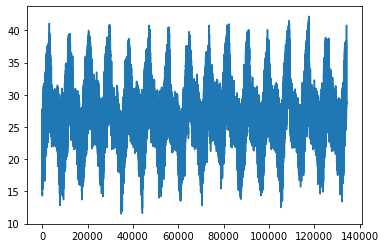

In [7]:
data['AirTemp'].plot()

<AxesSubplot:>

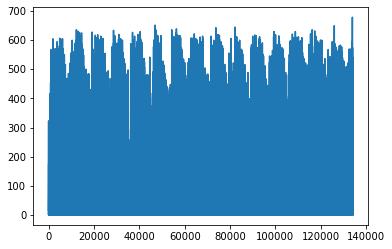

In [8]:
data['Dhi'].plot()

<AxesSubplot:>

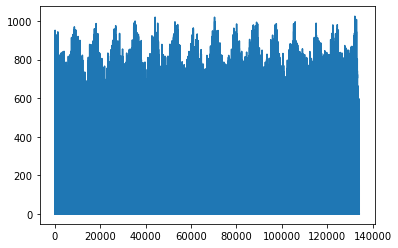

In [9]:
data['Dni'].plot()

<AxesSubplot:>

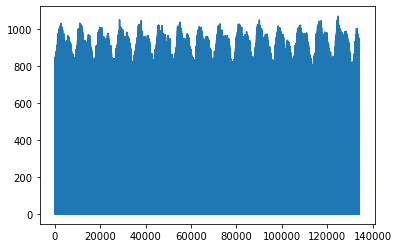

In [10]:
data['Ghi'].plot()

<AxesSubplot:>

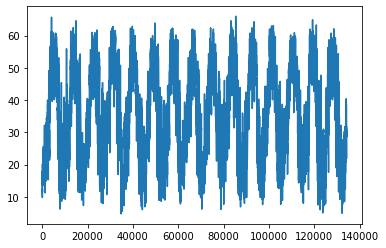

In [11]:
data['PrecipitableWater'].plot()

<AxesSubplot:>

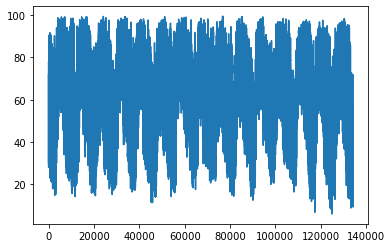

In [12]:
data['RelativeHumidity'].plot()

<AxesSubplot:>

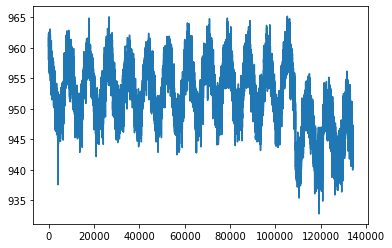

In [13]:
data['SurfacePressure'].plot()

<AxesSubplot:>

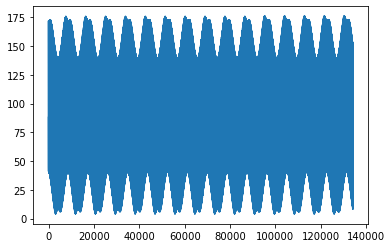

In [14]:
data['Zenith'].plot()

<AxesSubplot:>

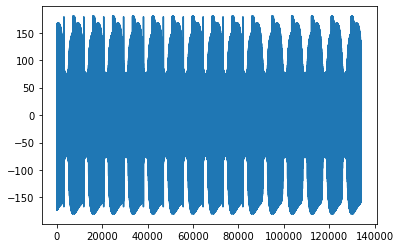

In [15]:
data['Azimuth'].plot()

<AxesSubplot:>

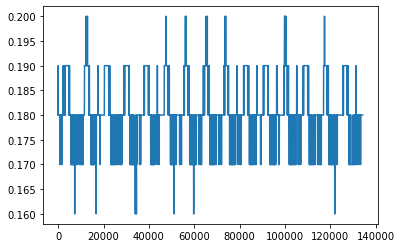

In [16]:
data['AlbedoDaily'].plot()

In [17]:
# EXISTING CORRELATIONS

<AxesSubplot:>

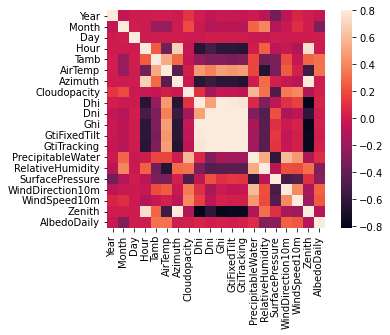

In [18]:
corrmat = data.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

In [19]:
# RELATIONSHIP BETWEEN RADIATION AND TEMPERATURE

Text(0.5, 0.98, 'AirTemp and Dhi')

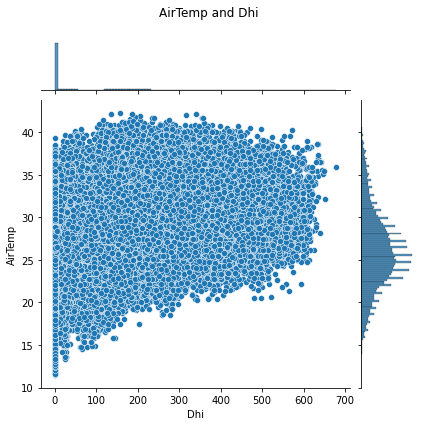

In [20]:
h = sns.jointplot(x="Dhi", y='AirTemp', data=data)
plt.subplots_adjust(top=0.9)
h.fig.suptitle('AirTemp and Dhi')

Text(0.5, 0.98, 'AirTemp and Ghi')

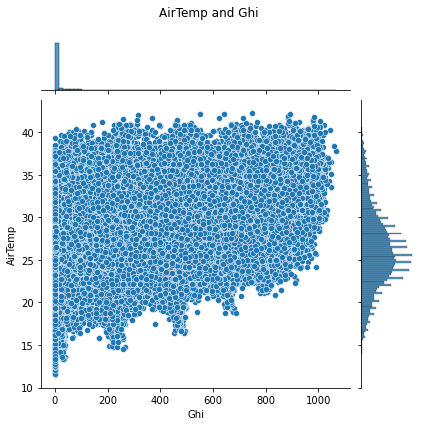

In [21]:
h = sns.jointplot(x="Ghi", y='AirTemp', data=data)
plt.subplots_adjust(top=0.9)
h.fig.suptitle('AirTemp and Ghi')

Text(0.5, 0.98, 'AirTemp and Dni')

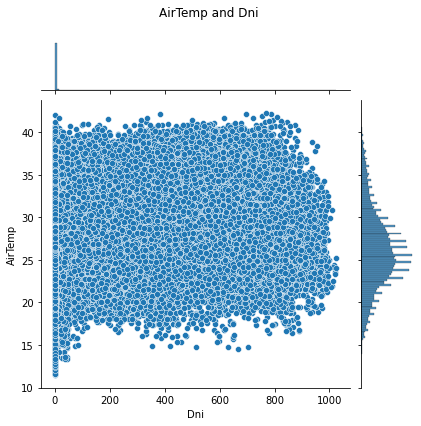

In [22]:
h = sns.jointplot(x="Dni", y='AirTemp', data=data)
plt.subplots_adjust(top=0.9)
h.fig.suptitle('AirTemp and Dni')

Text(0.5, 0.98, 'RelativeHumidity and Dni')

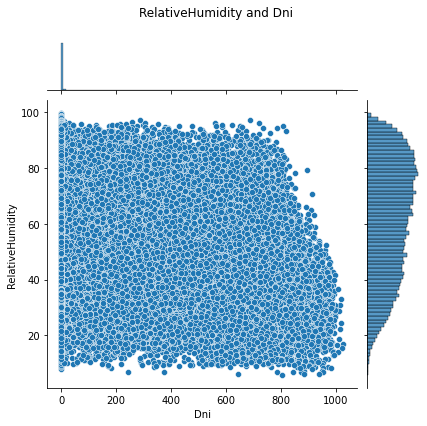

In [23]:
h = sns.jointplot(x="Dni", y='RelativeHumidity', data=data)
plt.subplots_adjust(top=0.9)
h.fig.suptitle('RelativeHumidity and Dni')

Text(0.5, 0.98, 'RelativeHumidity and Dhi')

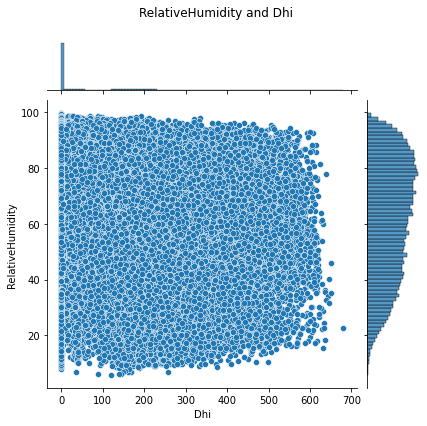

In [24]:
h = sns.jointplot(x="Dhi", y='RelativeHumidity', data=data)
plt.subplots_adjust(top=0.9)
h.fig.suptitle('RelativeHumidity and Dhi')

Text(0.5, 0.98, 'RelativeHumidity and Ghi')

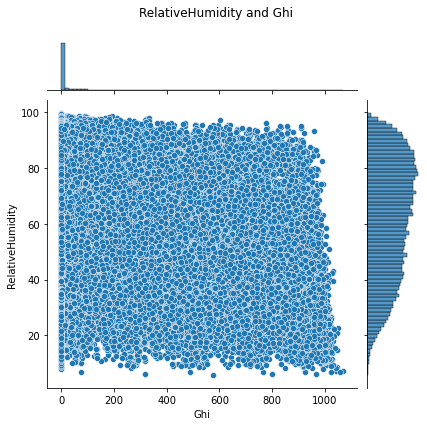

In [25]:
h = sns.jointplot(x="Ghi", y='RelativeHumidity', data=data)
plt.subplots_adjust(top=0.9)
h.fig.suptitle('RelativeHumidity and Ghi')

In [26]:
# DATA VISUALIZATION

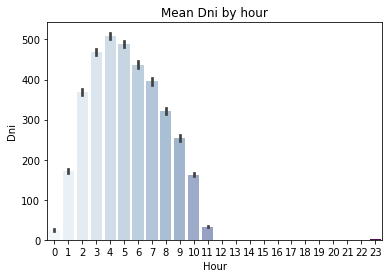

In [27]:
ax = plt.axes()
sns.barplot(x="Hour", y='Dni', data=data, palette="BuPu", ax=ax)
ax.set_title('Mean Dni by hour')
plt.show()

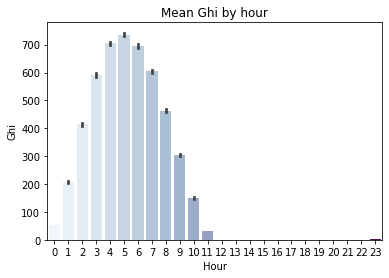

In [28]:
ax = plt.axes()
sns.barplot(x="Hour", y='Ghi', data=data, palette="BuPu", ax=ax)
ax.set_title('Mean Ghi by hour')
plt.show()

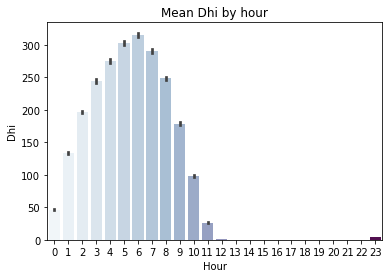

In [29]:
ax = plt.axes()
sns.barplot(x="Hour", y='Dhi', data=data, palette="BuPu", ax=ax)
ax.set_title('Mean Dhi by hour')
plt.show()

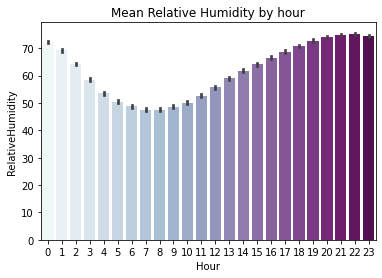

In [30]:
ax = plt.axes()
sns.barplot(x="Hour", y='RelativeHumidity', data=data, palette="BuPu", ax=ax)
ax.set_title('Mean Relative Humidity by hour')
plt.show()

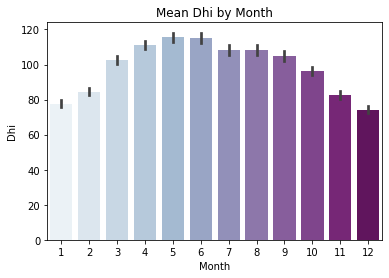

In [31]:
ax=plt.axes()
sns.barplot(x="Month", y='Dhi', data=data, palette="BuPu", ax=ax)
ax.set_title('Mean Dhi by Month')
plt.show()

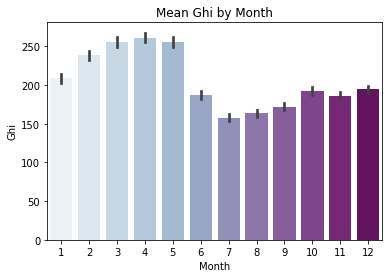

In [32]:
ax=plt.axes()
sns.barplot(x="Month", y='Ghi', data=data, palette="BuPu", ax=ax)
ax.set_title('Mean Ghi by Month')
plt.show()

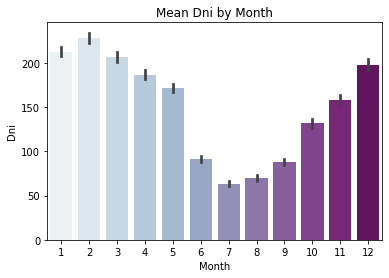

In [33]:
ax=plt.axes()
sns.barplot(x="Month", y='Dni', data=data, palette="BuPu", ax=ax)
ax.set_title('Mean Dni by Month')
plt.show()

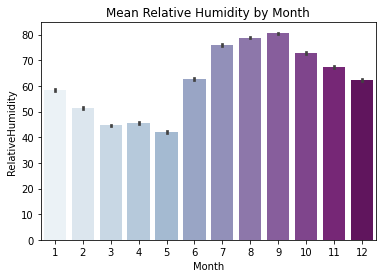

In [34]:
ax = plt.axes()
sns.barplot(x="Month", y='RelativeHumidity', data=data, palette="BuPu", ax=ax)
ax.set_title('Mean Relative Humidity by Month')
plt.show()

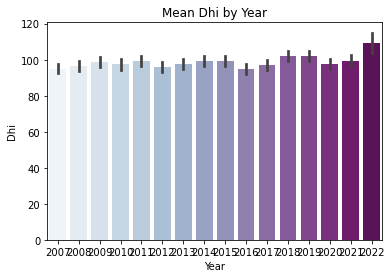

In [35]:
ax=plt.axes()
sns.barplot(x="Year", y='Dhi', data=data, palette="BuPu", ax=ax)
ax.set_title('Mean Dhi by Year')
plt.show()

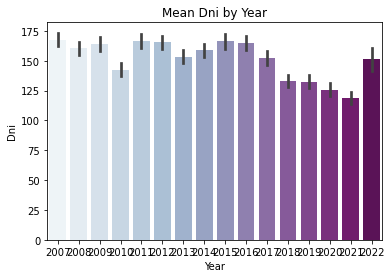

In [36]:
ax=plt.axes()
sns.barplot(x="Year", y='Dni', data=data, palette="BuPu", ax=ax)
ax.set_title('Mean Dni by Year')
plt.show()

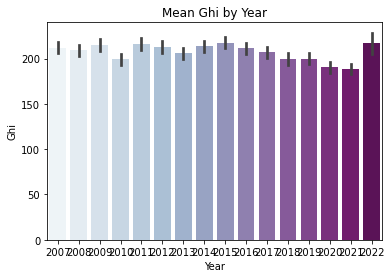

In [37]:
ax=plt.axes()
sns.barplot(x="Year", y='Ghi', data=data, palette="BuPu", ax=ax)
ax.set_title('Mean Ghi by Year')
plt.show()

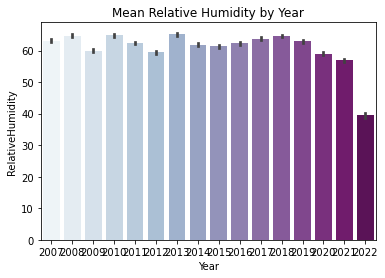

In [38]:
ax = plt.axes()
sns.barplot(x="Year", y='RelativeHumidity', data=data, palette="BuPu", ax=ax)
ax.set_title('Mean Relative Humidity by Year')
plt.show()

In [39]:
# CLUSTER ANALYSIS

In [40]:
from sklearn.cluster import KMeans

In [41]:
data=pd.read_csv("C:/Users/91849/Desktop/MAJOR PROJECT/"+"latest.csv")

In [42]:
X1 = data[['AirTemp' , 'RelativeHumidity']].iloc[:,:].values
inertia=[]
for n in range(1,15):
    algorithm=(KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

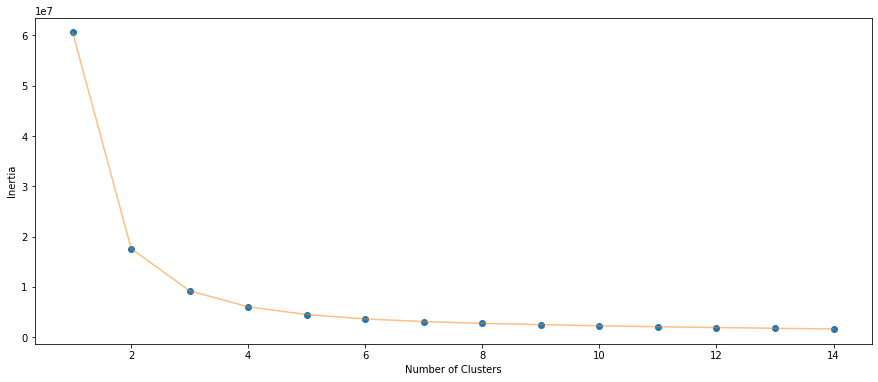

In [43]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [44]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='full') )
algorithm.fit(X1)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

In [45]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

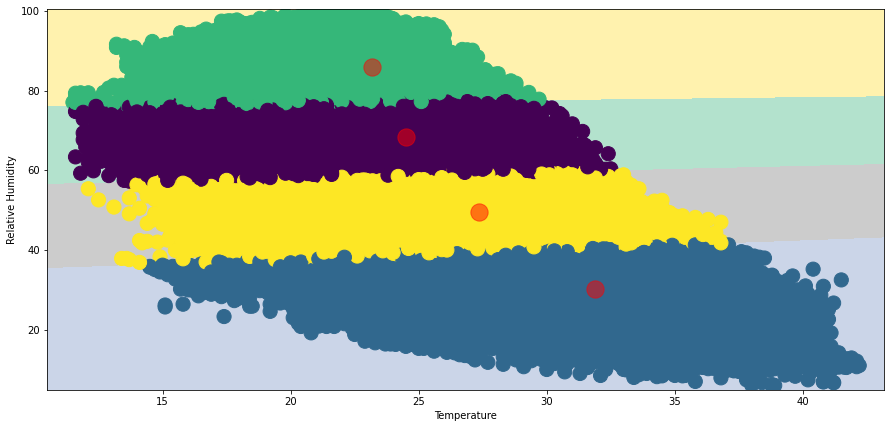

In [46]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'AirTemp' ,y = 'RelativeHumidity' , data = data , c = labels , 
            s = 200 )
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Relative Humidity') , plt.xlabel('Temperature')
plt.show()

In [47]:
# SPLITTING/SCALING

In [48]:
data['Year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022], dtype=int64)

In [49]:
data.dtypes

Year                   int64
Month                  int64
Day                    int64
Hour                   int64
Tamb                 float64
AirTemp              float64
Azimuth                int64
Cloudopacity         float64
Dhi                    int64
Dni                    int64
Ghi                    int64
GtiFixedTilt           int64
GtiTracking            int64
PrecipitableWater    float64
RelativeHumidity     float64
SurfacePressure      float64
WindDirection10m       int64
WindSpeed10m         float64
Zenith                 int64
AlbedoDaily          float64
dtype: object

In [50]:
y = data['Ghi'].copy()
x = data.drop('Ghi', axis=1).copy()

In [51]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=100)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=200)

In [53]:
def get_model_rmse(params):
    model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dval,'eval')], early_stopping_rounds=10, verbose_eval=0)
    results = model.eval(dval)
    rmse = np.float(re.search(r'[\d.]+$', results).group(0))
    return results

In [54]:
def objective(trail):
    learning_rate = trail.suggest_loguniform('learning_rate', 0.00001, 10.0)
    max_depth = trail.suggest_int('max_depth',4,8)
    l1_reg=trail.suggest_loguniform('l1_reg', 0.00001, 10.0)
    l2_reg=trail.suggest_loguniform('l2_reg', 0.00001, 10.0)
    
    params = {'learning_rate': learning_rate, 'max_depth': max_depth, 'alpha': l1_reg, 'lambda': l2_reg}
    return get_model_rmse(params)

In [55]:
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [56]:
classifier = ensemble.RandomForestClassifier(n_jobs=-1)
param_grid = { "n_estimators": [100,200,300,400],
             "max_depth": [1,3,5,7],
              "criterion": ["gini","entropy"]
             }

In [57]:
model = model_selection.GridSearchCV(estimator=classifier,
                                    param_grid=param_grid,
                                    scoring="accuracy",
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

In [58]:
model.fit(x,y)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5; 1/32] START criterion=gini, max_depth=1, n_estimators=100..............


C:\Users\91849\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[CV 1/5; 1/32] END criterion=gini, max_depth=1, n_estimators=100;, score=0.455 total time=  13.2s
[CV 2/5; 1/32] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 2/5; 1/32] END criterion=gini, max_depth=1, n_estimators=100;, score=0.455 total time=  10.3s
[CV 3/5; 1/32] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 3/5; 1/32] END criterion=gini, max_depth=1, n_estimators=100;, score=0.455 total time=   9.0s
[CV 4/5; 1/32] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 4/5; 1/32] END criterion=gini, max_depth=1, n_estimators=100;, score=0.455 total time=   9.3s
[CV 5/5; 1/32] START criterion=gini, max_depth=1, n_estimators=100..............
[CV 5/5; 1/32] END criterion=gini, max_depth=1, n_estimators=100;, score=0.455 total time=   9.4s
[CV 1/5; 2/32] START criterion=gini, max_depth=1, n_estimators=200..............
[CV 1/5; 2/32] END criterion=gini, max_depth=1, n_estimators=200;, score=0.455 total time=  18.8s
[CV 2/5

[CV 2/5; 10/32] END criterion=gini, max_depth=5, n_estimators=200;, score=0.511 total time=  41.6s
[CV 3/5; 10/32] START criterion=gini, max_depth=5, n_estimators=200.............
[CV 3/5; 10/32] END criterion=gini, max_depth=5, n_estimators=200;, score=0.510 total time=  44.6s
[CV 4/5; 10/32] START criterion=gini, max_depth=5, n_estimators=200.............
[CV 4/5; 10/32] END criterion=gini, max_depth=5, n_estimators=200;, score=0.509 total time=  44.8s
[CV 5/5; 10/32] START criterion=gini, max_depth=5, n_estimators=200.............
[CV 5/5; 10/32] END criterion=gini, max_depth=5, n_estimators=200;, score=0.515 total time=  43.2s
[CV 1/5; 11/32] START criterion=gini, max_depth=5, n_estimators=300.............
[CV 1/5; 11/32] END criterion=gini, max_depth=5, n_estimators=300;, score=0.513 total time= 1.2min
[CV 2/5; 11/32] START criterion=gini, max_depth=5, n_estimators=300.............
[CV 2/5; 11/32] END criterion=gini, max_depth=5, n_estimators=300;, score=0.511 total time= 1.1min
[

[CV 3/5; 19/32] END criterion=entropy, max_depth=1, n_estimators=300;, score=0.455 total time=  48.1s
[CV 4/5; 19/32] START criterion=entropy, max_depth=1, n_estimators=300..........
[CV 4/5; 19/32] END criterion=entropy, max_depth=1, n_estimators=300;, score=0.455 total time=  49.8s
[CV 5/5; 19/32] START criterion=entropy, max_depth=1, n_estimators=300..........
[CV 5/5; 19/32] END criterion=entropy, max_depth=1, n_estimators=300;, score=0.455 total time=  49.7s
[CV 1/5; 20/32] START criterion=entropy, max_depth=1, n_estimators=400..........
[CV 1/5; 20/32] END criterion=entropy, max_depth=1, n_estimators=400;, score=0.455 total time= 1.2min
[CV 2/5; 20/32] START criterion=entropy, max_depth=1, n_estimators=400..........
[CV 2/5; 20/32] END criterion=entropy, max_depth=1, n_estimators=400;, score=0.455 total time= 1.0min
[CV 3/5; 20/32] START criterion=entropy, max_depth=1, n_estimators=400..........
[CV 3/5; 20/32] END criterion=entropy, max_depth=1, n_estimators=400;, score=0.455 to

[CV 3/5; 28/32] END criterion=entropy, max_depth=5, n_estimators=400;, score=0.528 total time=  57.2s
[CV 4/5; 28/32] START criterion=entropy, max_depth=5, n_estimators=400..........
[CV 4/5; 28/32] END criterion=entropy, max_depth=5, n_estimators=400;, score=0.527 total time=  57.1s
[CV 5/5; 28/32] START criterion=entropy, max_depth=5, n_estimators=400..........
[CV 5/5; 28/32] END criterion=entropy, max_depth=5, n_estimators=400;, score=0.529 total time=  56.6s
[CV 1/5; 29/32] START criterion=entropy, max_depth=7, n_estimators=100..........
[CV 1/5; 29/32] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.557 total time=  17.8s
[CV 2/5; 29/32] START criterion=entropy, max_depth=7, n_estimators=100..........
[CV 2/5; 29/32] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.555 total time=  18.2s
[CV 3/5; 29/32] START criterion=entropy, max_depth=7, n_estimators=100..........
[CV 3/5; 29/32] END criterion=entropy, max_depth=7, n_estimators=100;, score=0.558 to

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=10)

In [59]:
print(model.best_score_)
print(model.best_estimator_.get_params())

0.5618178899752889
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [60]:
bestclassifier = ensemble.RandomForestClassifier(n_jobs=-1,
                                                 n_estimators=200,
                                                 max_depth=7,
                                                 criterion='entropy')

In [61]:
bestclassifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=200,
                       n_jobs=-1)

In [62]:
bestclassifier.predict(x_test)

array([ 47,   0,  16, ..., 408, 104,   0], dtype=int64)

In [63]:
x_test.shape

(40241, 19)

In [64]:
y_test.shape

(40241,)

In [65]:
prediction =bestclassifier.predict(x_test)

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

163.63649014686513
12.792047926226086


In [68]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, prediction)
print(r2)

0.9981911719030692


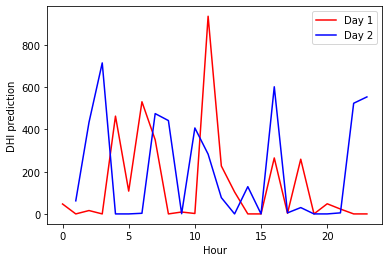

In [69]:
hour_val = data['Hour']
plt.plot(hour_val[:24],prediction[:24],color='red',label = 'Day 1')
plt.plot(hour_val[25:48],prediction[25:48],color='blue',label = 'Day 2')
plt.xlabel('Hour')
plt.ylabel('DHI prediction')
plt.legend(loc='best')
plt.show()

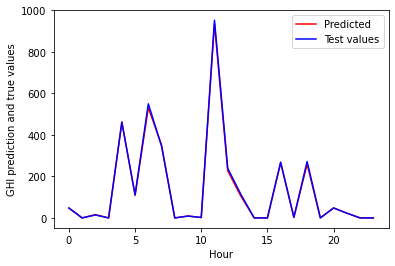

In [72]:
hour_val = data['Hour']
plt.plot(hour_val[:24],prediction[:24],color='red',label = 'Predicted')
plt.plot(hour_val[:24],y_test[:24],color='blue',label = 'Test values')
plt.xlabel('Hour')
plt.ylabel('GHI prediction and true values')
plt.legend(loc='best')
plt.show()